# Table Of Contents

1. Introduction
2. Challenges in Solving Hospital Return Visits
3. Dataset Description
    - 3.1. Overview
    - 3.2. Readmission Categorization
    - 3.3. Features in the Dataset
4. Project Setup
5. Exploratory Data Analysis 
    - 5.1 Feature Type Classification
    - 5.2 Missing Values and Incomplete Data
    - 5.3 Exploration of Categorical Variables and Data Distribution
    - 5.4 Exploration of Continuous Variables Through Violin Plots
    - 5.4 Understanding the impact of medication and age group on readmission
6. Data Cleaning And Pre-processing
7. Machine Learning Model Evaluation and Hyperparameter Tuning
    - 7.1. Model Selection and Justification
    - 7.2. Selection of Performance Metrics
    - 7.3. Cross-Validation and Hyperparameter Tuning for SVM
    - 7.4 In-depth Analysis of Cross-Validation and Pre-processing Strategies
    - 7.5 Plotting Model Performance with Hyper-Parameters
8. Conclusion: Comparison and Insights
    - 8.1 Model Performance Overview: Mean and Std Metrics


### Introduction

Diabetes makes sugar levels in the blood too high. Checking diabetic patients while they're in the hospital is really important. This study wants to figure out if a diabetic patient might come back to the hospital within 30 days. Knowing this could help save money on treatment, solve medical problems, and make sure patients stay healthy and safe. We have used information from Virginia Commonwealth University to do this study. 

### Challenges in Solving Hospital Return Visits

In working with the data for diabetic patients' hospital readmission, several challenges surfaced. One significant hurdle was incomplete or missing information within the dataset. This incompleteness primarily affected crucial fields, such as patient weight, which is a pivotal factor in diabetic care and treatment analysis. Another challenge was the complexity and diversity of the data itself. The dataset encompassed a vast array of information spanning multiple hospitals and a decade's worth of records. These records included diverse data points, from lab tests to medication histories and hospital stays. Managing such a breadth of information while ensuring accuracy and relevance posed a considerable challenge. Finally the feature selection process was also a challenge. The dataset contained over 50 features, and it was difficult to determine which features were relevant to the problem at hand.

### Dataset Description

#### Overview

The dataset (https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008) used in this study covers ten years (1999-2008) and includes information from 130 hospitals and healthcare networks in the US. Each entry in the dataset relates to hospital records of patients diagnosed with diabetes. It contains details about their lab tests, medicines they took, and how long they stayed, for up to 14 days. The main aim is to figure out if these patients might need to go back to the hospital within 30 days after leaving.

#### Readmission Categorization

In the dataset, there are three distinct classes used for readmission categorization:

1. `<30` indicates patients who were readmitted in less than 30 days.
2. `>30` represents patients who were readmitted in more than 30 days.
3. `No` signifies no record of readmission.

To streamline the classification task, we categorize patients into two groups: those with no record of readmission versus those with a record of readmission, achieved by consolidating the classes labeled as "<30" and ">30".

#### Features in the Dataset

The dataset comprises various features that provide detailed information about patient encounters in hospitals. Some of the features include:

1. **Encounter ID and Patient Number:** Unique identifiers for each patient's encounter and individual patient in the dataset.

2. **Race and Gender:** Categorical features representing the patient's race and gender. Race includes categories such as Caucasian, Asian, African American, Hispanic, and others. Gender includes male, female, and unknown/invalid values.

3. **Age:** Categorized into 10-year intervals ranging from 0 to 100 years old.

4. **Weight:** Indicates the patient's weight in pounds.

5. **Admission Type, Discharge Disposition, and Admission Source IDs:** Categorical features represented by integer identifiers, signifying details about the admission type, discharge disposition, and admission source.

6. **Time in Hospital:** Represents the duration of the patient's hospital stay in days.

7. **Payer Code and Medical Specialty:** Categorical features denoting the payer code and medical specialty, providing information about the patient's insurance payer and the admitting physician's specialty.

8. **Number of Lab Procedures, Procedures, and Medications:** Numeric features indicating the count of lab procedures, non-lab procedures, and distinct medications administered during the patient encounter.

9. **Number of Outpatient, Emergency, and Inpatient Visits:** Numeric features indicating the count of outpatient, emergency, and inpatient visits of the patient in the year before the encounter.

10. **Diagnosis Codes (Diag_1, Diag_2):** Categorical features representing primary and secondary diagnoses using codes from the International Classification of Diseases, 9th Revision (ICD9). These codes signify specific medical diagnoses or conditions.

11. **A1Cresult:** Another categorical feature representing the range of a test result or indicating if the test wasn't conducted. The values include >8 if the result was greater than 8%, >7 if between 7% and 8%, normal if less than 7%, and none if the test wasn't conducted. No missing values are present for this feature.

12. **Medication Features (e.g., Metformin, Repaglinide, Nateglinide, Chlorpropamide, Glimepiride, Acetohexamide):** These categorical features indicate if a drug was prescribed or if there was a change in dosage during the patient encounter. Values include 'up' for increased dosage, 'down' for decreased dosage, 'steady' for unchanged dosage, and 'no' if the drug was not prescribed. There are no missing values for these features.

In our analysis, we will first explore the dataset and perform exploratory data analysis (EDA) to gain insights into the data. We will then clean the data and perform pre-processing to prepare it for machine learning. Finally, we will train and evaluate machine learning models to predict hospital readmission.

### Project Setup

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



import warnings
warnings.filterwarnings("ignore")

### Exploratory Data Analysis 

In [17]:
path = 'diabetic_data.csv'
dataset = pd.read_csv(path)

print(f'The shape of the dataset is: {dataset.shape}\n')
print(f'The type of the columns is:\n{dataset.dtypes.value_counts()}')

The shape of the dataset is: (101766, 50)

The type of the columns is:
object    37
int64     13
Name: count, dtype: int64


#### Feature Type Classification

The data contains 50 features and 101766 samples, which makes the sample-to-feature ratio 2035:1

The features can be classified into the following categories:
categorical features = 37
continuous features = 13

In [18]:
categorical_features = []  
continuous_features = []   

for column in dataset.columns:
    if dataset[column].dtype == 'object':
        categorical_features.append(column)
    else:
        unique_values = dataset[column].nunique()
        if unique_values <= 15:  
            categorical_features.append(column)
        else:
            continuous_features.append(column)

print("Categorical Features:")
print(categorical_features)
print("\nContinuous Features:")
print(continuous_features)

print("\nData Snippet")
print("\n")
print(dataset.head(5))


Categorical Features:
['race', 'gender', 'age', 'weight', 'admission_type_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_procedures', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

Continuous Features:
['encounter_id', 'patient_nbr', 'discharge_disposition_id', 'admission_source_id', 'num_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

Data Snippet


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  F

In [19]:
dataset.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### Missing Values and Incomplete Data

In [20]:
# Find number of missing values in each column
print("Number of missing values in each column")

for column in dataset.columns:
    if dataset[column].dtype == object:
        # Counting '?' as missing
        missing_values_count = dataset[column][dataset[column] == '?'].count()
        # Counting NaN and NA as missing
        missing_values_count += dataset[column].isna().sum()
        if missing_values_count > 10:
            print(column, missing_values_count)

Number of missing values in each column
race 2273
weight 98569
payer_code 40256


medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 96420
A1Cresult 84748


##### Observation

The above analysis reveals a substantial number of missing values across various columns, with some notable ones being 'weight' and 'max_glu_serum', each missing 98,569 and 96,420 values respectively. Other columns like 'payer_code' and 'medical_specialty' also have significant gaps, with over 40,000 and nearly 50,000 missing entries. 

#### Exploration of Categorical Variables and Data Distribution

##### To check for imbalanced classes, we select the major categorical variables that are sensitive and plot their distribution.

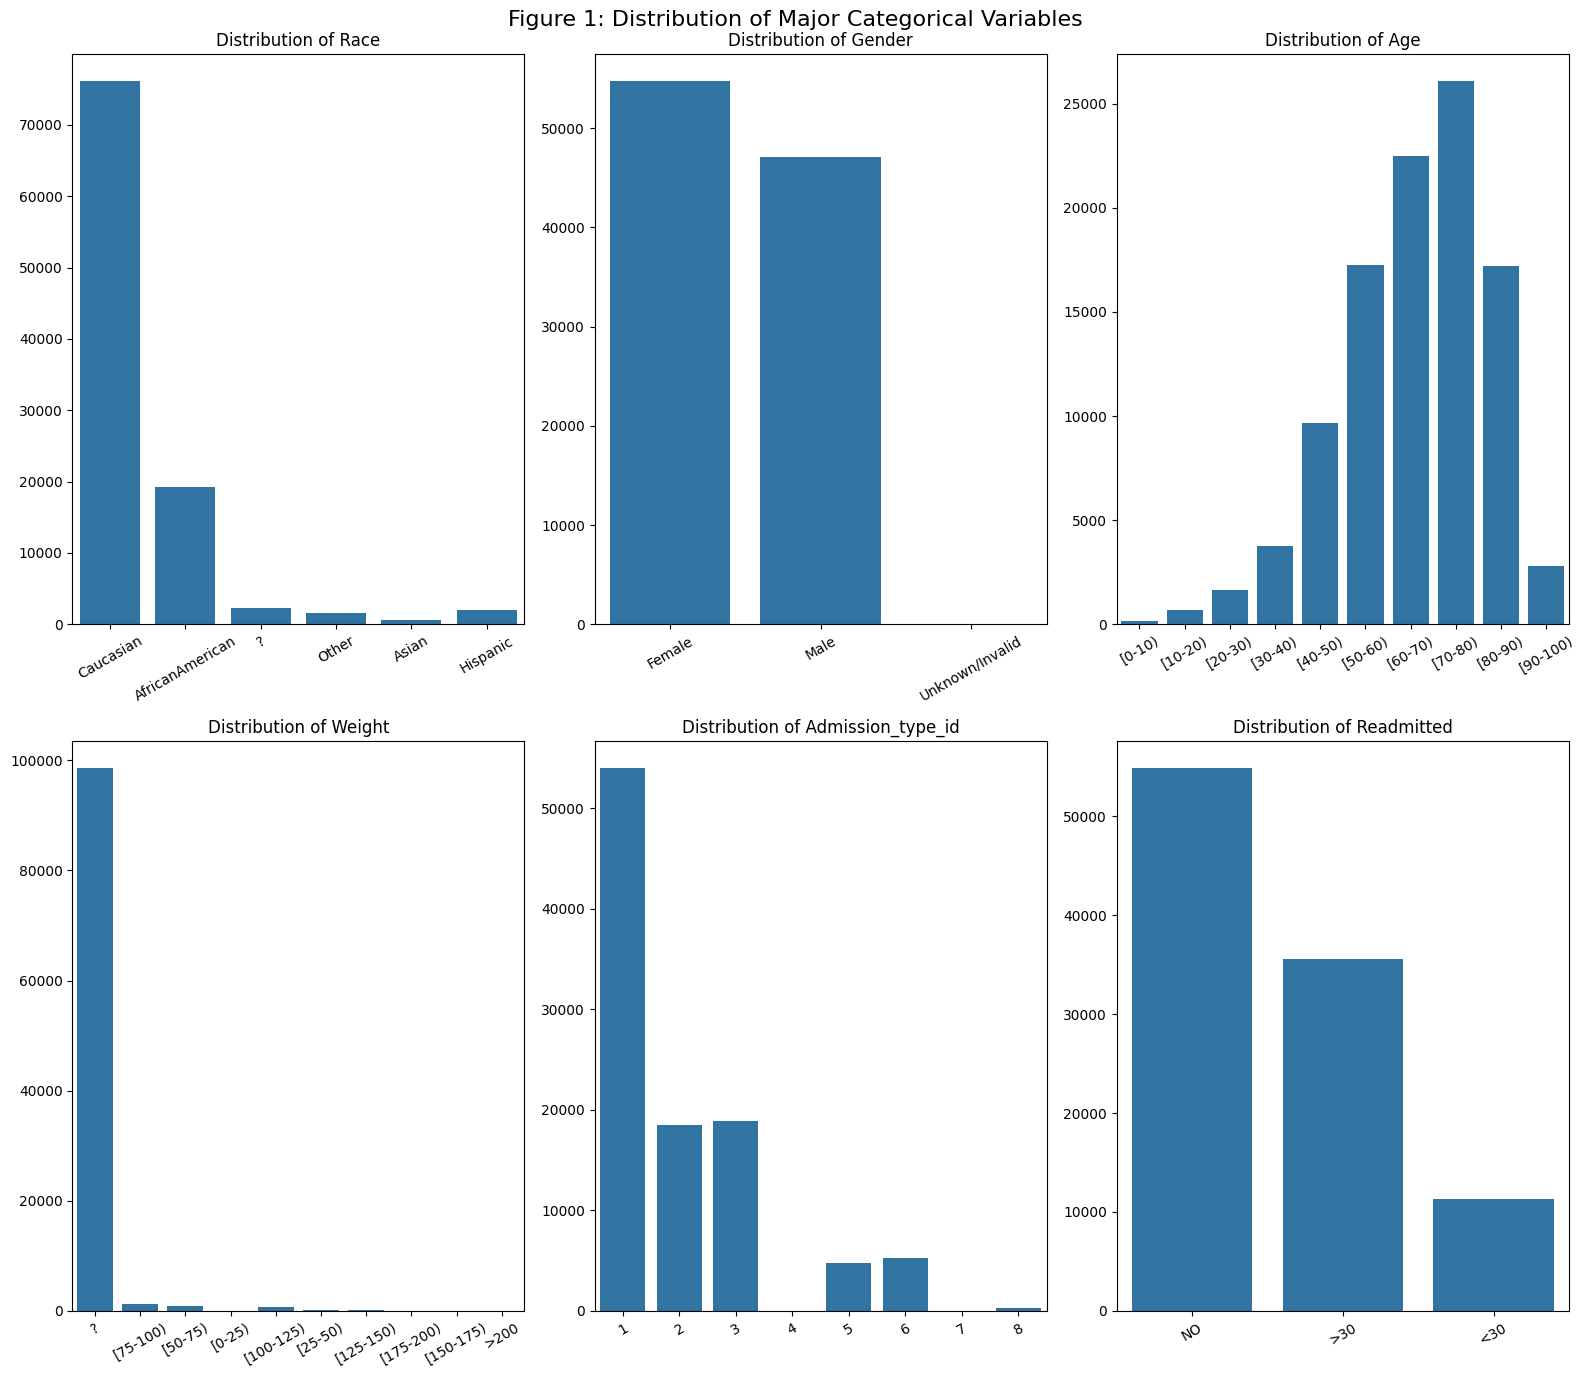

In [21]:
categorical_columns = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'readmitted']

# Visualizing the distribution of categorical variables
plt.figure(figsize=[16, 14])
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=dataset)
    plt.xticks(rotation=30)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f"Distribution of {col.capitalize()}")

plt.suptitle('Figure 1: Distribution of Major Categorical Variables', size=16)
plt.tight_layout()
plt.show()

#### Exploration of Continuous Variables Through Violin Plots

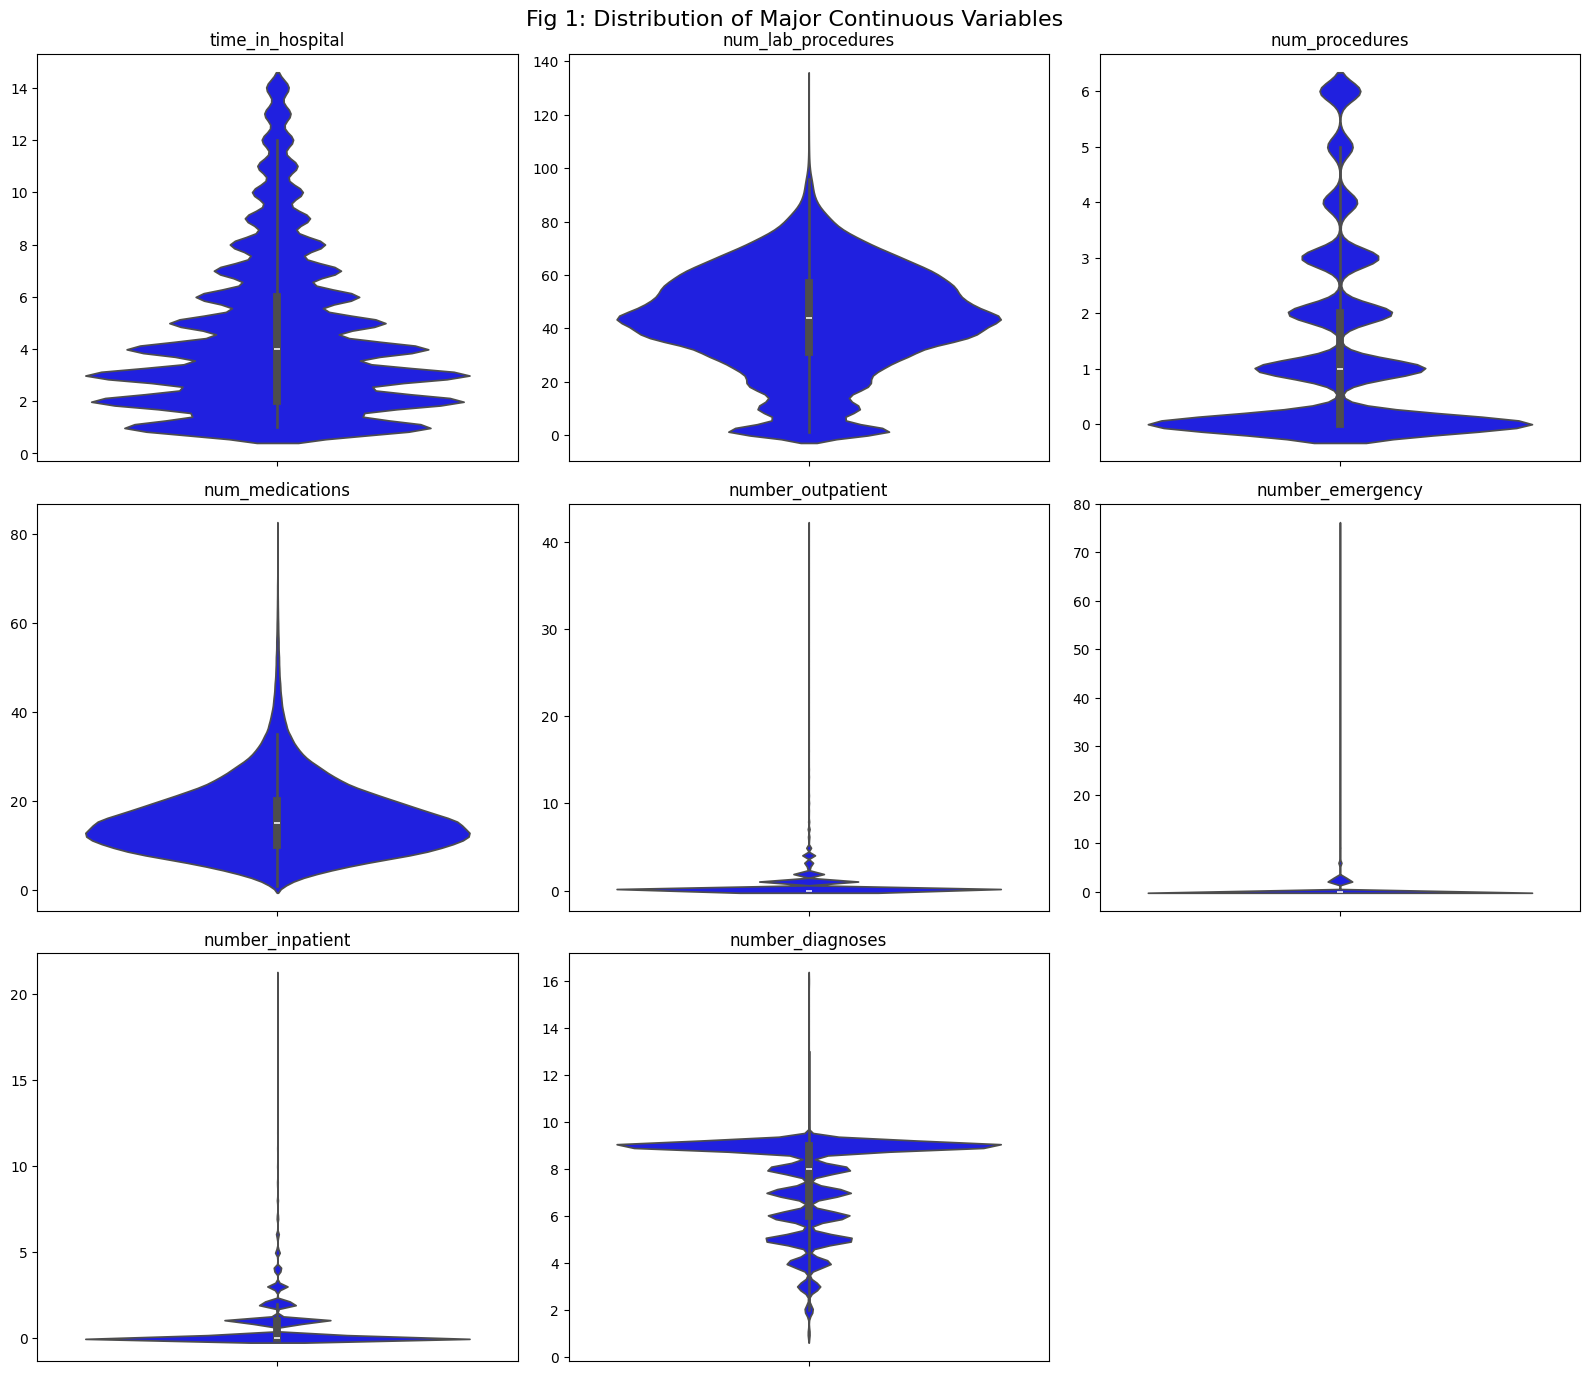

In [22]:

# List of columns for violin plots
continuous_columns = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient',
    'number_diagnoses'
]

# Creating violin plots
plt.figure(figsize=[16, 14])
for i, col in enumerate(continuous_columns):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(data=dataset, y=col, color="blue")
    plt.xticks(rotation=30)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col)

plt.suptitle('Fig 1: Distribution of Major Continuous Variables', size=16)
plt.tight_layout()
plt.show()

##### Observation 

The violin plots generated provide an insightful view into the distribution of major continuous variables within the dataset. Each plot visually represents the probability density and variation of a specific continuous variable. 


- `time_in_hospital`: The 'time_in_hospital' plot shows that most patients spend a shorter time in the hospital, usually between 1 and 4 days. Beyond this range, there's a drop in how often patients stay longer. However, a few cases stand out where patients stayed significantly longer than usual.

- `num_lab_procedures`: The 'num_lab_procedures' plot displays a varied distribution. It appears that many patients undergo around 40 to 60 lab procedures. This range captures the highest density of cases, suggesting that a significant number of patients experience this specific range of procedures.

- `num_procedures`: The 'num_procedures' plot shows the highest density at 0, indicating that a majority of patients didn't undergo additional procedures during their hospital visits.

- `num_medications`: In the 'num_medications' plot, most of the density falls between 0 and 20, indicating that a large number of patients were prescribed a relatively low to moderate amount of medications. However, there's a notable decrease in frequency for medication counts beyond 40, suggesting fewer cases where patients were prescribed a higher number of medications.

- `number_outpatient`: In the 'number_outpatient' plot, there's noticeably less density around zero, suggesting that only a few patients had no outpatient visits. 

- `number_emergency`: The reduced density around the value of 1 in the 'number_emergency' plot suggests fewer cases where patients had precisely one emergency visit

- `number_inpatient`: In the 'number_inpatient' plot, there is a higher density around the value of 0, indicating that a majority of patients had no inpatient visits. There's a lesser but still noticeable density around the value of 1, but the occurrences decrease notably after 5 inpatient visits.

- `number_diagnoses`: In the 'number_diagnoses' plot, the highest density appears between 8 and 10, showing that many patients had diagnoses falling within this range. 


#### Understanding the impact of medication and age group on readmission

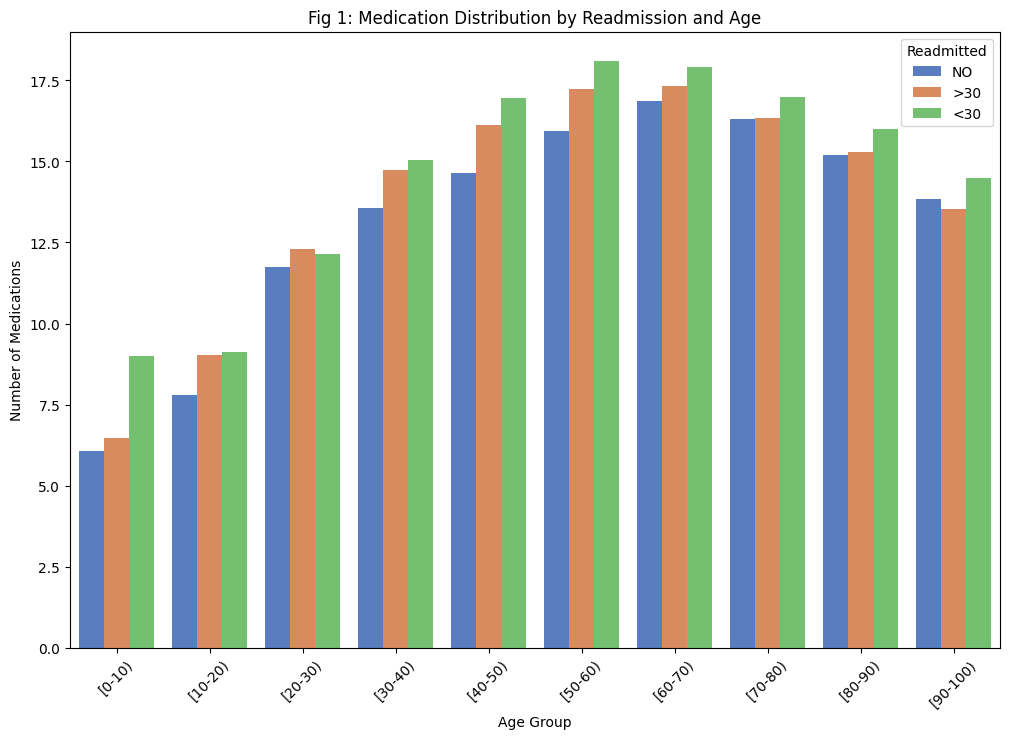

In [23]:
# Comparing age groups with other variables (e.g., number of medications)
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='num_medications', hue='readmitted', data=dataset, palette='muted', ci=None)
plt.title('Fig 1: Medication Distribution by Readmission and Age')
plt.xlabel('Age Group')
plt.ylabel('Number of Medications')
plt.xticks(rotation=45)
plt.legend(title='Readmitted', loc='upper right')
plt.show()

##### Analysis: Number of Medications Across Age Groups by Readmission Status

The grouped bar chart illustrates the distribution of the number of medications across various age groups categorized by readmission status. Each age group is represented by two bars - one indicating the number of medications for patients who were readmitted and the other for those who were not. Across all age categories, there seems to be a consistent pattern where patients who were readmitted generally had a higher number of medications compared to those who were not readmitted. Notably, this trend appears consistent across different age groups, suggesting a potential association between a higher number of medications and increased likelihood of readmission across age demographics.

### Data Cleaning And Pre-processing

The assembly and pre-processing of the dataset were carried out through the following steps:

1. **Dropped Columns:**
    Columns such as 'weight,' 'payer_code,' and 'medical_specialty' were removed from the dataset due to their irrelevance caused by a high number of missing values.

2. **Missing Value Imputation:**
    Features like 'race', 'diag1', 'diag2', 'diag3' have few missing values. Since these are categorical variables, we performed missing value imputation by replacing '?' with 'NaN' values so that '?' doesn't interfere with our analysis.

3. **Split Dataset:**
    The dataset was split into separate training and test sets to prevent data leakage during preprocessing.

4. **Encoding:**
    Categorical variables were identified for encoding to handle appropriately.

4. **Pipeline Construction:**
    Pipelines were made for scaling continuous variables and encoding categoricals.

5. **Column Transformer:**
    A ColumnTransformer combined the pipelines to apply to respective columns.

6. **Preprocessing:**
    Prior to splitting data, the only preprocessing was replacing '?' with '0' in Step 2. Columns with excessive missing values were previously dropped. Additional preprocessing was avoided to prevent data leakage.

This detailed procedure ensures the integrity and appropriate handling of the dataset, laying the groundwork for subsequent analysis.

In [24]:
# Define the list of columns to be processed
cols = [
    'race', 'gender', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
    'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 
    'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
    'metformin-pioglitazone', 'metformin-rosiglitazone', 
    'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 
    'tolbutamide', 'acetohexamide', 'diabetesMed', 'change', 'max_glu_serum',
    'A1Cresult', 'max_glu_serum', 'diag_1', 'diag_2', 'diag_3'
]

# Convert specified columns to string type
for col in cols:
    dataset[col] = dataset[col].astype(str)

# Drop rows with any missing values
dataset = dataset.dropna()

# Define input features, excluding specific columns
input_data = dataset.drop(['weight', 'payer_code', 'medical_specialty', 'readmitted'], axis=1)

# Prepare output data by encoding 'readmitted' category
# Encoding: 'NO' as 0, others as 1
output_data = [0 if i == 'NO' else 1 for i in dataset['readmitted']]

# Split data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(input_data, output_data, test_size=0.30)

# Define columns for different preprocessing strategies
continuous_columns = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 
    'number_inpatient', 'number_diagnoses'
]
categorical_columns_onehot_enc = ['diag_1', 'diag_2', 'diag_3']
categorical_columns_ordinal_enc = [
    'race', 'gender', 'metformin', 'repaglinide', 'nateglinide', 
    'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 
    'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
    'metformin-rosiglitazone', 'glimepiride-pioglitazone', 
    'glipizide-metformin', 'troglitazone', 'tolbutamide', 
    'acetohexamide', 'diabetesMed', 'change', 'max_glu_serum', 
    'A1Cresult', 'max_glu_serum'
]

# Define preprocessing pipelines for different types of variables
# Continuous variables: scaling
continuous_column_tx = Pipeline(steps=[("scaling", StandardScaler())])

# Categorical variables (One-hot encoding)
categorical_column_onehot_tx = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy="most_frequent")),
    ("OneHotEncoding", OneHotEncoder(handle_unknown='ignore'))
])

# Categorical variables (Ordinal encoding)
categorical_column_ordinal_tx = Pipeline(steps=[
    ("ModeImputer", SimpleImputer(strategy="most_frequent")),
    ("OrdinalEncoding", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine all preprocessing pipelines using column transformer
column_tx = ColumnTransformer(transformers=[
    ('continuous', continuous_column_tx, continuous_columns),
    ('categorical_onehot', categorical_column_onehot_tx, categorical_columns_onehot_enc),
    ('categorical_ordinal', categorical_column_ordinal_tx, categorical_columns_ordinal_enc)
])

### Machine Learning Model Evaluation and Hyperparameter Tuning


#### Model Selection and Justification

For our analysis, we have chosen three models to predict hospital readmission:

**Logistic regression classifier:**

    - Logistic regression is a supervised machine learning algorithm commonly used for classification. In logistic regression, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. Based on a set of input features, logistic regression outputs a probability that a new input belongs to a particular class. To make a prediction, a threshold is applied to this probability. Key advantages of logistic regression include its simplicity and interpretability. The model assigns a weight to each input feature, allowing assessment of its relative contribution to the outcome. Disadvantages are that performance depends heavily on meeting key assumptions, and it is prone to overfitting with irrelevant features or complex datasets.

**Random forest classifier:**

    - Random forest is an ensemble supervised machine learning technique used both for classification and regression. It operates by constructing a multitude of decision trees at training time. To make a prediction for a new input, it aggregates the predictions of the individual trees. A key characteristic of random forest is that the constituent trees depend on the values of a random vector sampled independently. This results in a variety of uncorrelated trees, leading to improved predictions over single decision tree models. Key advantages of random forests include handling of non-linear relationships, high accuracy, and avoidance of overfitting. Drawbacks include their "black box" nature, heavier computational requirements, and tendency to be biased when class data is imbalanced.

**K Nearest Neighbors classifier:**

    - K nearest neighbors (KNN) is a simple supervised machine learning algorithm commonly leveraged for classification. Based on a dataset of points with known class memberships, the algorithm categorizes unlabeled points based on the class of points geographically nearest to them. The distance between points is computed with metrics like Euclidean distance. The hyperparameter K specifies the number of neighbors to examine. An unlabeled point is ultimately classified by identifying the most common class among its K nearest neighbors. Key advantages of KNN's are their nonparametric nature. Drawbacks include computational inefficiency for large datasets and sensitivity to irrelevant features


#### Selection of Performance Metrics

The choice of metrics depends on the specific problem we're addressing and the aspects of predictions we want to emphasize. In our case, we aim for accurate overall predictions while being particularly cautious about false negatives. False negatives occur when people are predicted to be readmitted within more than 30 days, but they were actually readmitted within less than 30 days. This is crucial to monitor because our dataset is imbalanced, and a bias might be introduced if our model predicts more of the majority classes. We want to avoid making risky assumptions about a person's health.

To address this, we use the F1 score, which specifically helps track the number of false negatives in our overall predictions by considering the number of true positives. The F1 score is a combined measure of Precision and Recall, both of which are metrics for monitoring the ratio of true positives concerning total positives in predictions and actual true positives, respectively.



#### Cross-Validation and Hyperparameter Tuning different ML Models

In [25]:
# Stratified k-fold cross validation is more appropriate for imbalanced class data compared to regular k-fold cross validation. 
# Regular k-fold can amplify class imbalance across folds, resulting in biased prediction estimates. 
# Stratified k-fold maintains the original class proportions in each fold, avoiding additional inequality introduction during cross validation.
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd

train_X = train_X[1:10000]
train_y = train_y[1:10000]

models = [KNeighborsClassifier, LogisticRegression, RandomForestClassifier]

mean_std = []
best_para = []
results_for_comparison = []

for model in models:

    CV_pipeline = Pipeline(steps=[('preprocessing_pipeline',column_tx),
                                  (type(model()).__name__,model())])

    if model == LogisticRegression:
        param_grid = {'LogisticRegression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                      'LogisticRegression__C': [1e-1, 1, 10, 100]}
    elif model == RandomForestClassifier:
        param_grid = {'RandomForestClassifier__n_estimators': [10, 25, 50],
                     'RandomForestClassifier__max_depth': [None, 5, 10, 20]}
    elif model == KNeighborsClassifier:
        param_grid = {'KNeighborsClassifier__n_neighbors': [3, 5, 7, 9],
                      'KNeighborsClassifier__weights': ['uniform', 'distance']}

    for n in [3, 7]:
        print(f'Running {n}-fold cross validation for {type(model()).__name__} model')
        cv = StratifiedKFold(n_splits=n, shuffle=True)

        search = GridSearchCV(CV_pipeline, param_grid, scoring='f1', cv=cv, error_score='raise')
        search.fit(train_X, train_y)
        best_para.append((type(model()).__name__, search.best_params_, search.best_score_))
        print(f'Best parameters: {search.best_params_}')
        print(f'Best score: {search.best_score_}')
        predictions = search.predict(test_X)
        test_score = precision_recall_fscore_support(predictions, test_y, average='weighted')
        print(f'Precision: {test_score[0]}')
        print(f'Recall: {test_score[1]}')
        print(f'F1: {test_score[2]}')
        acc_score = accuracy_score(predictions, test_y)

        results_for_comparison.append((n, type(model()).__name__, search.best_params_, test_score[0], test_score[1], test_score[2], acc_score))

        cv_results = search.cv_results_
        mean_scores = cv_results['mean_test_score']
        std_scores = cv_results['std_test_score']

        for mean, std, params in zip(mean_scores, std_scores, cv_results['params']):
            mean_std.append((n, type(model()).__name__, str(params), round(mean, 3), round(std, 3),
                             test_score[0], test_score[1], test_score[2], acc_score))

performance_df = pd.DataFrame(mean_std, columns=['Splits', 'Model', 'Parameters', 'Mean', 'StdD', 'precision', 'recall', 'f1', 'accuracy'])
results_df = pd.DataFrame(results_for_comparison, columns=['Splits', 'Model', 'Best Parameters', 'precision', 'recall', 'f1', 'accuracy'])


Running 3-fold cross validation for KNeighborsClassifier model
Best parameters: {'KNeighborsClassifier__n_neighbors': 5, 'KNeighborsClassifier__weights': 'uniform'}
Best score: 0.5112068366062648
Precision: 0.5765462029185618
Recall: 0.5687848018342614
F1: 0.5714513616069306
Running 7-fold cross validation for KNeighborsClassifier model
Best parameters: {'KNeighborsClassifier__n_neighbors': 7, 'KNeighborsClassifier__weights': 'uniform'}
Best score: 0.5176652262647174
Precision: 0.5892558604842909
Recall: 0.5778578447428758
F1: 0.5815435303191863
Running 3-fold cross validation for LogisticRegression model
Best parameters: {'LogisticRegression__C': 100, 'LogisticRegression__solver': 'lbfgs'}
Best score: 0.5507218726100407
Precision: 0.6118136364494021
Recall: 0.6001310186701605
F1: 0.6037609233581555
Running 7-fold cross validation for LogisticRegression model
Best parameters: {'LogisticRegression__C': 1, 'LogisticRegression__solver': 'liblinear'}
Best score: 0.5465697859735393
Precisio

#### In-depth Analysis of Cross-Validation and Pre-processing Strategies

1. CV Pipeline: The cross-validation pipeline first applies the preprocessing pipeline, then passes the processed data to the ML model. The preprocessing pipeline scales continuous variables and encodes categorical variables. Embedding preprocessing inside the cross-validation pipeline avoids data leakage.

2. Parameter Grid: A possible parameter list is defined for the models. The hyperparameter tuning model picks the best combination for each model.

3. Importing Preprocessing Pipleine: The preprocessing pipeline built in previous task is imported here.

4. GridSearchCV: It is our hyperparameter tuning algorithm that helps the model to pick the best set of parameters from the parameter grid. It uses the CV_Pipeline to fit the model with differnt sets of parameters, until the best set of parameters is found.

5. StratifiedKfold CV: It is used to perform cross-validation of the model, to prevent overfitting and improve accuracy. We try to run CV for 2 different k-fold values to provide multiple estimations.


#### Plotting Model Performance with Hyper-Parameters

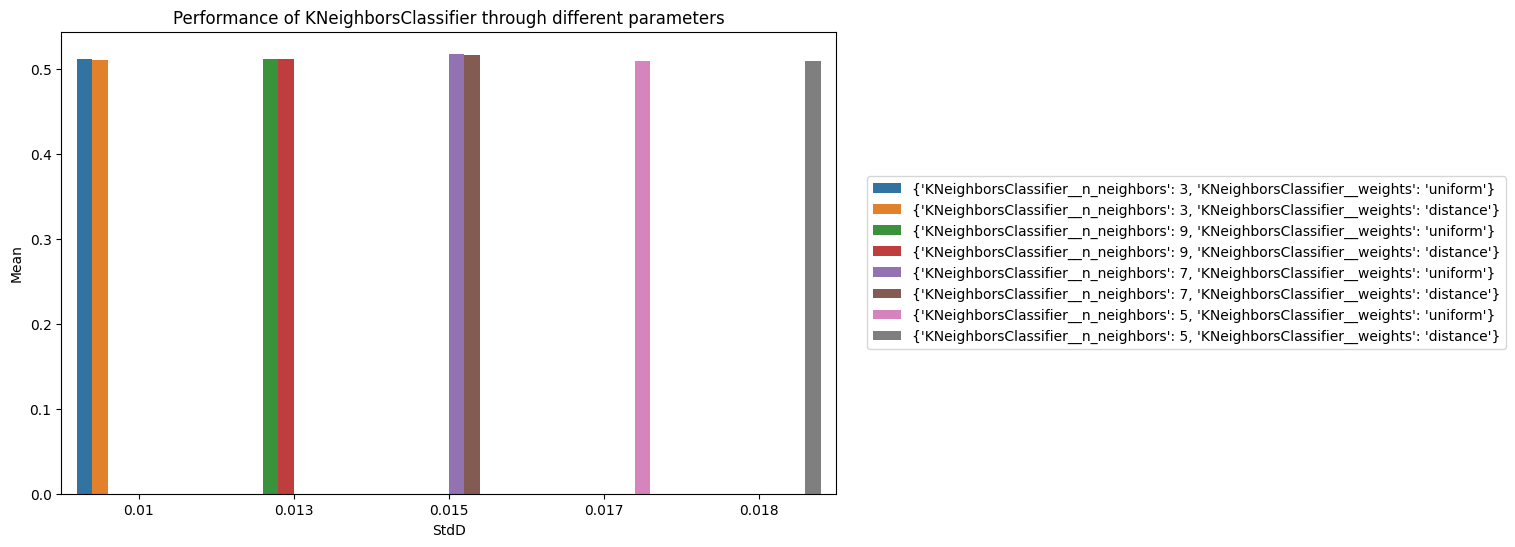

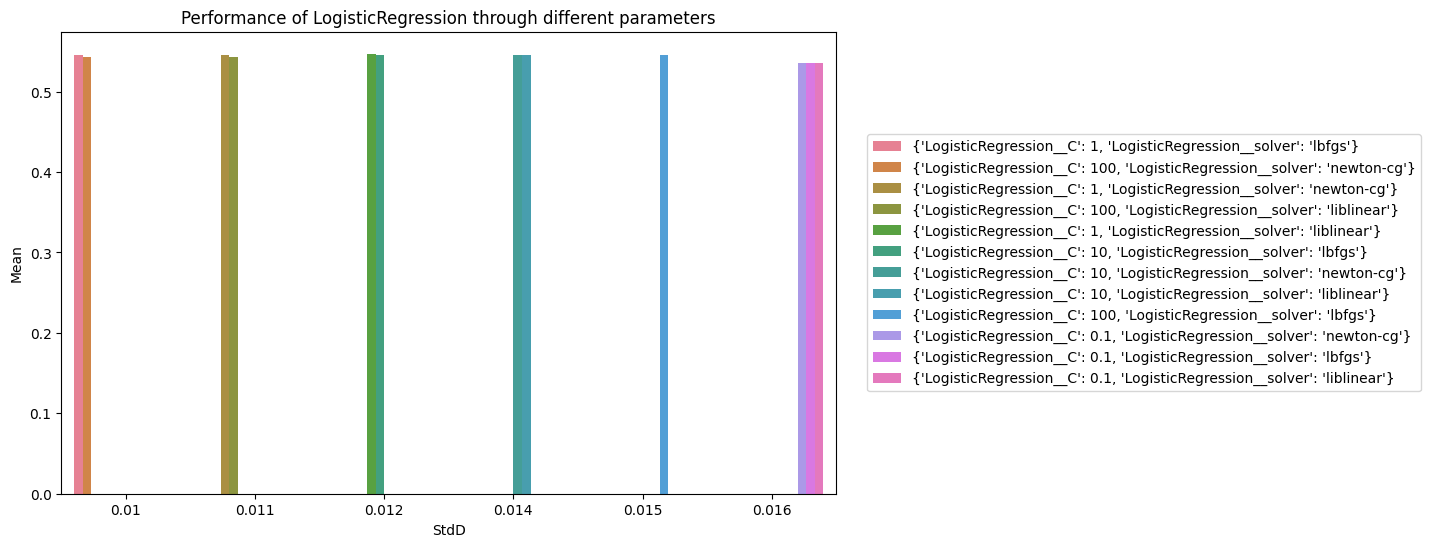

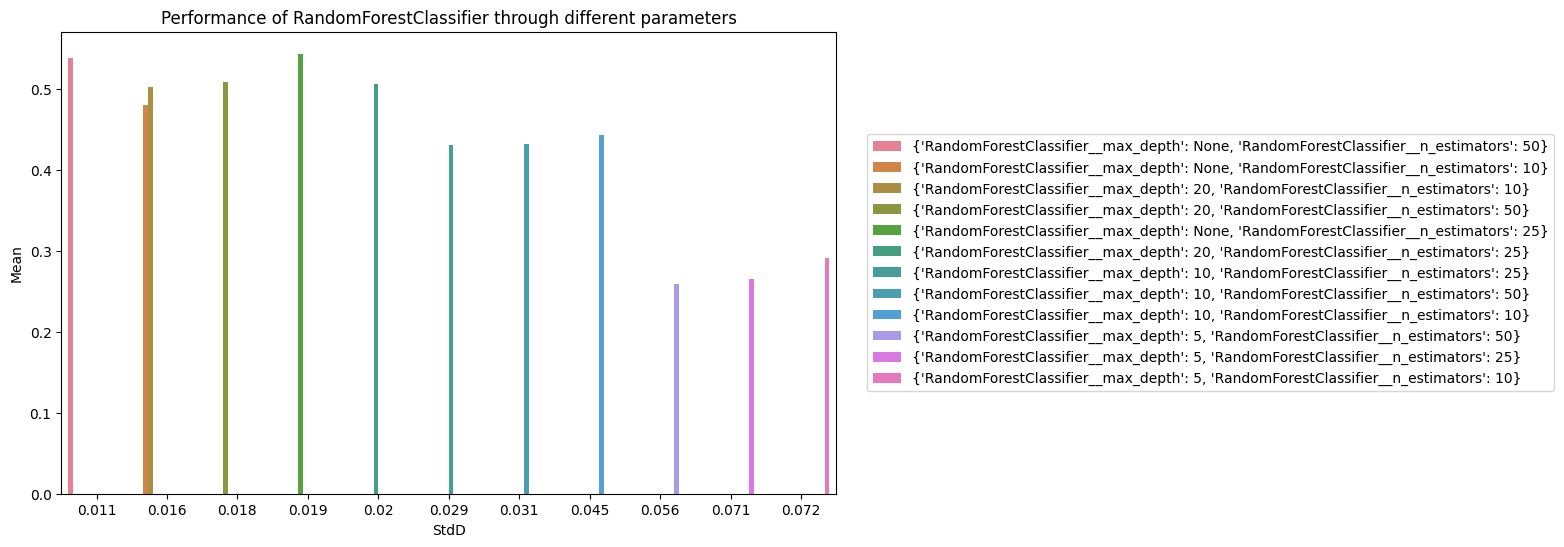

In [26]:
models = performance_df.Model.unique()

for i in range(len(models)):
    df = performance_df[(performance_df.Model==models[i]) & (performance_df.Splits==7)]
    plt.figure(figsize=[10,6])
    colors = sns.color_palette('husl', n_colors=len(df))
    sns.barplot(y='Mean', x='StdD', data=df, hue='Parameters')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0)
    plt.xticks(rotation=0)
    plt.title(f'Performance of {models[i]} through different parameters')
plt.show()

### Conclusion: Comparison and Insights

- The distribution of mean varies a lot for  RandomForest Classifier but it doesn't vary much of Logistic Regression or KNeighbours Classifier. 
- k=3 works better for RandomForest Classifier and KNeighbours Classifier k=7 works better for Logistic Regression.

#### Model Performance Overview: Mean and Std Metrics

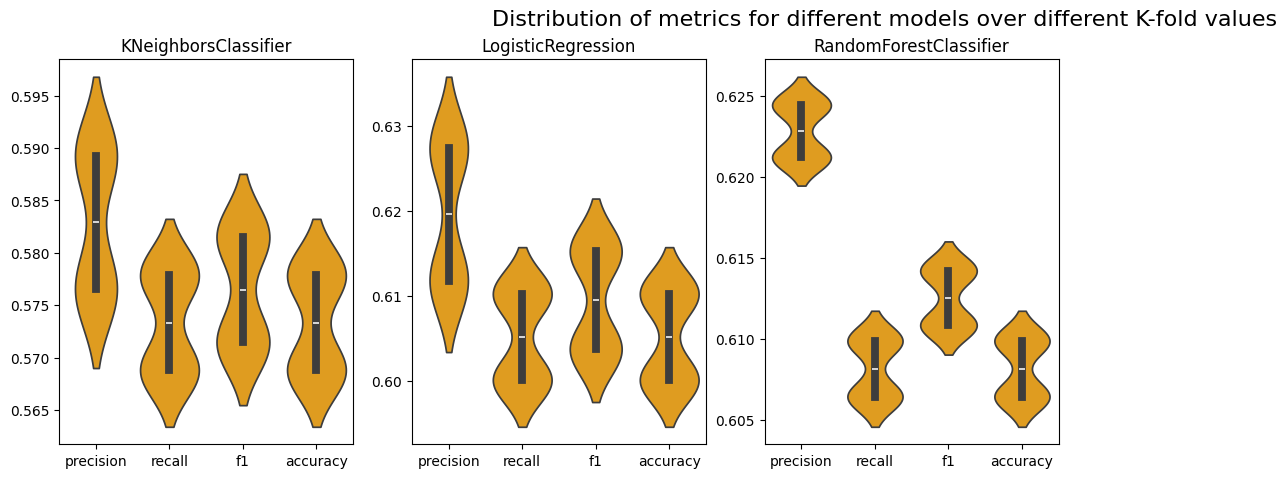

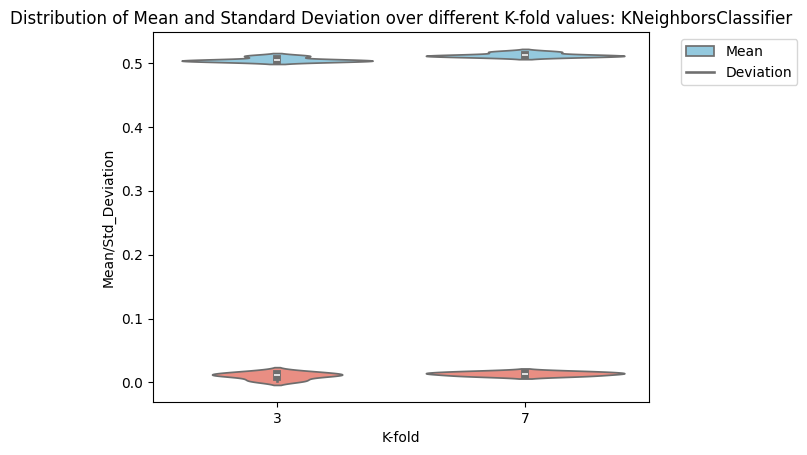

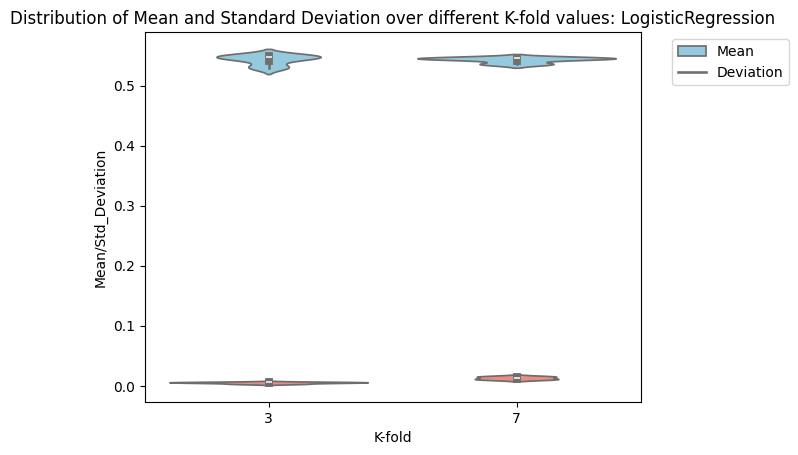

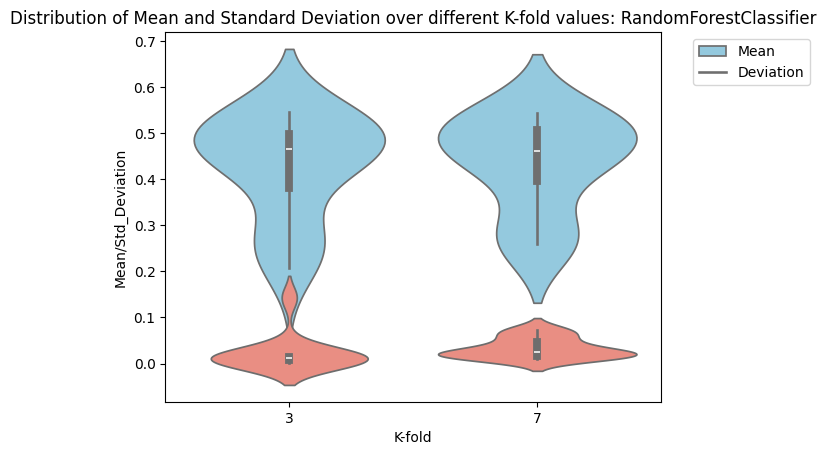

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# First set of plots - Metrics across models
fig = plt.figure(figsize=[22,5])

for i, model in enumerate(models):
    plt.subplot(1,5,i+1)
    df = performance_df[performance_df['Model'] == model][['precision', 'recall', 'f1', 'accuracy']]
    sns.violinplot(data=df ,color="orange")
    plt.title(f'{models[i]}')
    # ax.set_title(f'{model}')
plt.suptitle('Distribution of metrics for different models over different K-fold values', size=16)
plt.show()



for i in range(len(models)):
    df = performance_df[(performance_df.Model==models[i])]
    if not df.empty: 
        sns.violinplot(x="Splits", y="Mean", data=df, color="skyblue")
        sns.violinplot(x="Splits", y="StdD", data=df, color="salmon")
        plt.title(f'Distribution of Mean and Standard Deviation over different K-fold values: {models[i]}')
        plt.xlabel('K-fold')
        plt.ylabel('Mean/Std_Deviation')
        plt.legend(labels=["Mean", "Deviation"], bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.show()
    else:
        print(f"No data available for model: {models[i]}")



In [28]:
results_df[results_df['Splits'] == 3].sort_values(by='f1', ascending=False)

,Splits,Model,Best Parameters,precision,recall,f1,accuracy
4,3,RandomForestClassifier,"{'RandomForestClassifier__max_depth': None, 'R...",0.624420,0.609859,0.614186,0.609859
2,3,LogisticRegression,"{'LogisticRegression__C': 100, 'LogisticRegres...",0.611814,0.600131,0.603761,0.600131
0,3,KNeighborsClassifier,"{'KNeighborsClassifier__n_neighbors': 5, 'KNei...",0.576546,0.568785,0.571451,0.568785


In [29]:
results_df[results_df['Splits'] == 7].sort_values(by='f1', ascending=False)

,Splits,Model,Best Parameters,precision,recall,f1,accuracy
3,7,LogisticRegression,"{'LogisticRegression__C': 1, 'LogisticRegressi...",0.627327,0.610252,0.615227,0.610252
5,7,RandomForestClassifier,"{'RandomForestClassifier__max_depth': None, 'R...",0.621193,0.606420,0.610830,0.606420
1,7,KNeighborsClassifier,"{'KNeighborsClassifier__n_neighbors': 7, 'KNei...",0.589256,0.577858,0.581544,0.577858
